<a href="https://colab.research.google.com/github/casse-stylo/Le_chaosateur_genial/blob/main/ML_application3_galaxies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Recognizing galaxy morphology with a convolutional neural network

The goal is to develop and train a convolutional neural network to recognize galaxy morphology from images labelled as part of the Galaxy Zoo project (https://data.galaxyzoo.org/).






For this, we will use the Galaxy MNIST database, which contains 10,000 images of galaxies (either 3x64x64 or 3x224x224) labelled by Galaxy Zoo volunteers. GalaxyMNIST has four classes: smooth and round, smooth and cigar-shaped, edge-on-disk, and unbarred spiral.




The galaxies are selected from Galaxy Zoo DECaLS Campaign A (GZD-A), which classified images taken by DECaLS and released in DR1 and 2. The images are as shown to volunteers on Galaxy Zoo, except for a 75% crop followed by a resize to 64x64 pixels.




At least 17 people must have been asked the necessary questions, and at least half of them must have answered with the given class. The class labels are therefore much more confident than from, for example, simply labelling with the most common answer to some question.


For more details, see https://github.com/mwalmsley/galaxy_mnist/tree/main?tab=readme-ov-file, https://zenodo.org/records/4573248, and https://ui.adsabs.harvard.edu/abs/2022MNRAS.509.3966W/abstract.


#Installation of Galaxy MNIST

Note : It will probably be necessary to restard the kernel after installing the package


In [1]:
!git clone https://github.com/mwalmsley/galaxy_mnist
!pip install -e galaxy_mnist

Cloning into 'galaxy_mnist'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 59 (delta 30), reused 42 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 3.38 MiB | 12.01 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Obtaining file:///content/galaxy_mnist
  Preparing metadata (setup.py) ... done
  Running setup.py develop for galaxyMNIST


# Use


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from galaxy_mnist import GalaxyMNIST

# Load the 64x64 pixel images
dataset = GalaxyMNIST(
    root='galaxy_mnist',
    download=True,
    train=True  # by default, or set False for test set
)

100%|██████████| 68.7M/68.7M [00:00<00:00, 140MB/s]


Extracting galaxy_mnist/GalaxyMNIST/raw/train_dataset.hdf5.gz to galaxy_mnist/GalaxyMNIST/raw


100%|██████████| 17.3M/17.3M [00:00<00:00, 268MB/s]


Extracting galaxy_mnist/GalaxyMNIST/raw/test_dataset.hdf5.gz to galaxy_mnist/GalaxyMNIST/raw


In [2]:
# images and labels here
images, labels = dataset.data, dataset.targets

# convert to numpy
images_np = images.numpy()
labels_np = labels.numpy()

# rearrange the images in a channel-last format
#images_ra = np.moveaxis(images_np, source=1, destination=3)

# divide between a training set and a test set
(train_images, train_labels), (test_images, test_labels) = dataset.load_custom_data(test_size=0.8, stratify=True)


In [ ]:
# For high-resolution images
# from galaxy_mnist import GalaxyMNISTHighrez
#
# 224 pixel images
# dataset = GalaxyMNISTHighrez(
#    root='galaxy_mnist',
#    download=True,
#    train=True  # by default, or set False for test set
# )


# Some examples

<ipython-input-3-d27f3f9cb22a>:3: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  plt.imshow(train_images[i].T)


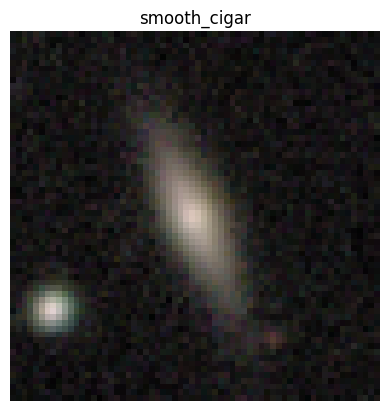

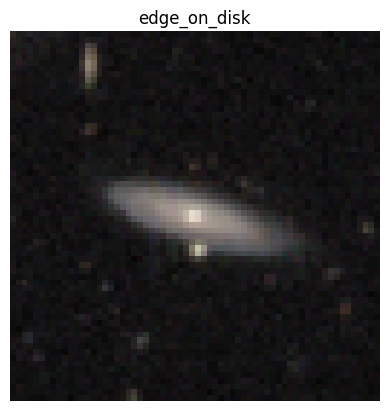

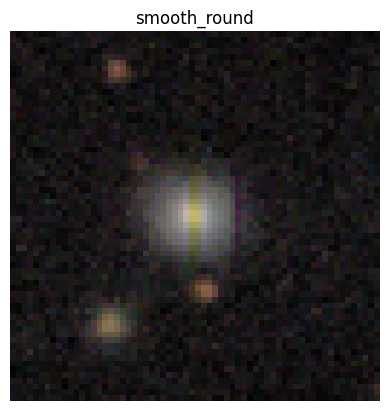

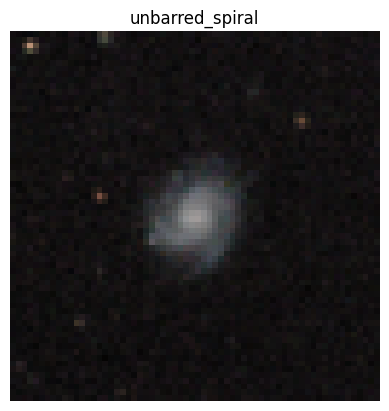

In [3]:
for i in [0,1,2,30]:
  plt.figure()
  plt.imshow(train_images[i].T)
  plt.title(GalaxyMNIST.classes[train_labels[i]])
  plt.axis('off')


# Your turn to play!




*   Plot images of galaxies with different labels
*   Check whether the dataset is balanced
*   Separate a training set and a test set
*   Design and train a convolutional neural network: number of layers, depth of the layers, size of the kernels, pooling, dropout, activation functions, batch size, number of epochs...
*   Evaluate the performance : check correctly and incorrectly classified examples, calculate the global accuracy and the error rate, plot the model training history, calculate for each class precision, recall, specificity, F1 score, plot the confusion matrix
*   Are there classes that are better identified?
*   Optimize the network, possibly focusing on the identification of one class
*   Write up a report on latex/overleaf, including a block diagram of the network, the diagnostic figures, the performances




In [8]:
# prepare the data for training

xmax=train_images.max()
train_images = train_images / xmax
test_images  = test_images  / xmax

print("Training image shape", train_images.shape)
print("Testing image shape", test_images.shape)



Training image shape torch.Size([2000, 3, 64, 64])
Testing image shape torch.Size([8000, 3, 64, 64])


In [9]:
# building the neural network

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

In [ ]:
from keras import layers

model = Sequential()

model.add( layers.Input((28,28,1)) )

model.add( layers.Conv2D(8, (3,3),  activation='relu') )
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Dropout(0.2))

model.add( layers.Conv2D(16, (3,3), activation='relu') )
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Dropout(0.2))

model.add( layers.Flatten())
model.add( layers.Dense(100, activation='relu'))
model.add( layers.Dropout(0.5))

model.add( layers.Dense(10, activation='softmax'))

---

## To go further: play with the Galaxy10 SDSS dataset



Galaxy10 SDSS is a dataset contains 21785 69x69 pixels colored galaxy images (g, r and i band) separated in 10 classes. Galaxy10 SDSS images come from Sloan Digital Sky Survey and labels come from Galaxy Zoo. Cf. https://astronn.readthedocs.io/en/stable/galaxy10sdss.html#introduction



```
Galaxy10 dataset (21785 images)
├── Class 0 (3461 images): Disk, Face-on, No Spiral
├── Class 1 (6997 images): Smooth, Completely round
├── Class 2 (6292 images): Smooth, in-between round
├── Class 3 (394 images): Smooth, Cigar shaped
├── Class 4 (1534 images): Disk, Edge-on, Rounded Bulge
├── Class 5 (17 images): Disk, Edge-on, Boxy Bulge
├── Class 6 (589 images): Disk, Edge-on, No Bulge
├── Class 7 (1121 images): Disk, Face-on, Tight Spiral
├── Class 8 (906 images): Disk, Face-on, Medium Spiral
└── Class 9 (519 images): Disk, Face-on, Loose Spiral
```

# Installation of Galaxy10 SDSS


In [16]:
!pip install tensorflow
!pip install tensorflow_probability
!pip install git+https://github.com/henrysky/astroNN.git

  Cloning https://github.com/henrysky/astroNN.git to /tmp/pip-req-build-8cgsuwrl
  Running command git clone --filter=blob:none --quiet https://github.com/henrysky/astroNN.git /tmp/pip-req-build-8cgsuwrl
  Resolved https://github.com/henrysky/astroNN.git to commit 41bc2bf5f537e1dd6aa2f9b27229267048b38db9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 50.7 MB/s eta 0:00:00
  Created wheel for astroNN: filename=astroNN-1.2.dev0-py3-none-any.whl size=116163 sha256=a56192eb9d57f065c9efc1e7d998590586e400b6f2a035bbe04286e840f94638
  Stored in directory: /tmp/pip-ephem-wheel-cache-0ltc8oju/wheels/22/d1/2b/2a4d4d76da90d8da

# Use

In [2]:
# Modules to import

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
#from keras.utils import np_utils
from keras.utils import to_categorical

In [18]:
from tensorflow.keras import utils
from astroNN.datasets import load_galaxy10sdss
#from import galaxy10cls_lookup

# To load images and labels (will download automatically at the first time)
# First time downloading location will be ~/.astroNN/datasets/
images, labels = load_galaxy10sdss()

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# To convert to desirable type
labels_np = labels.astype(np.float32)
images_np = images.astype(np.float32)

/root/.astroNN/datasets/Galaxy10.h5 was found!


ValueError: too many values to unpack (expected 2)

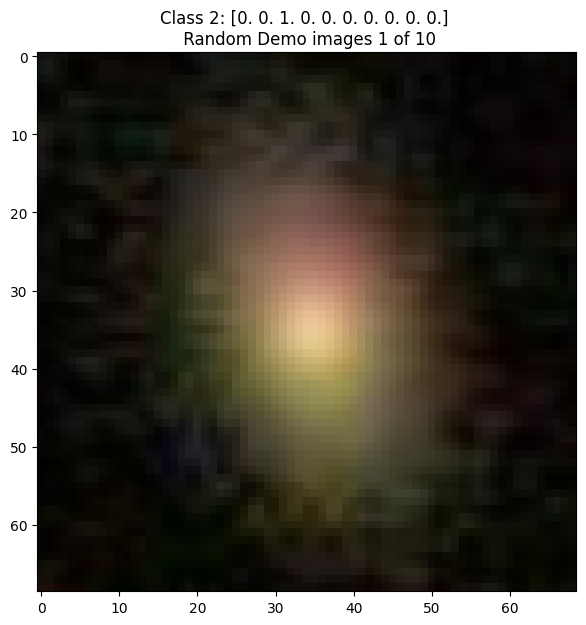

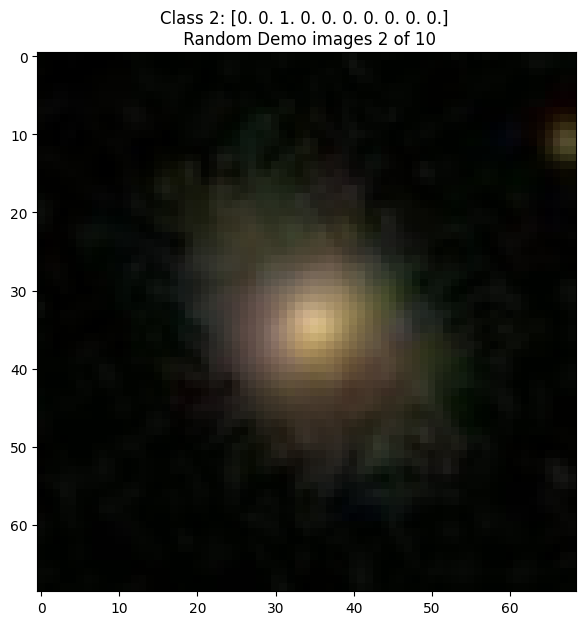

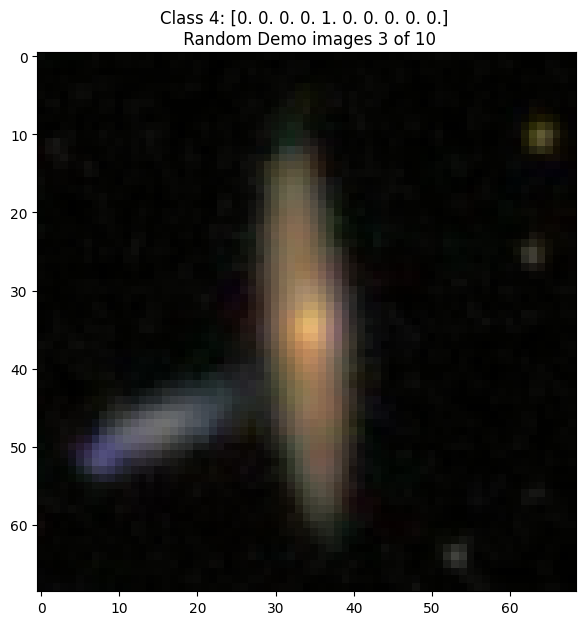

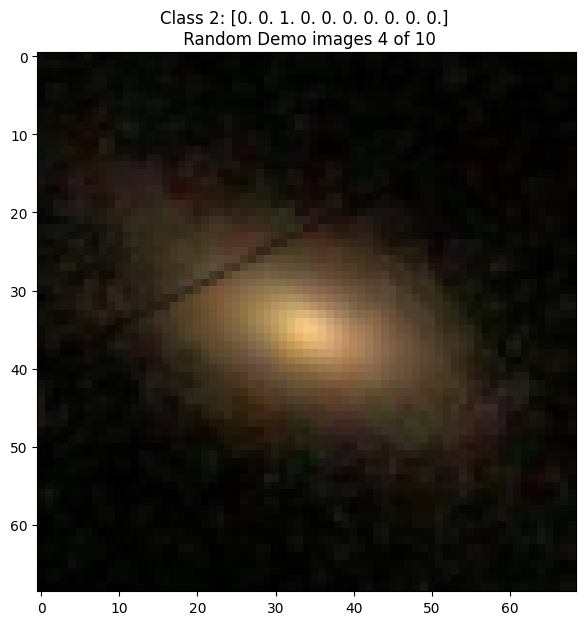

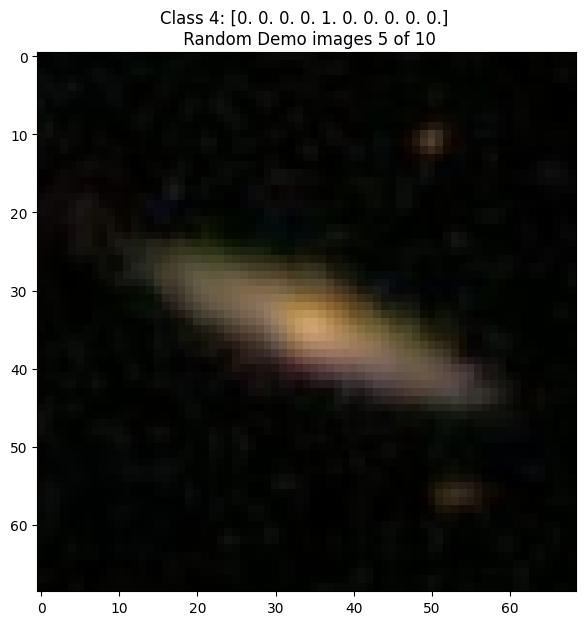

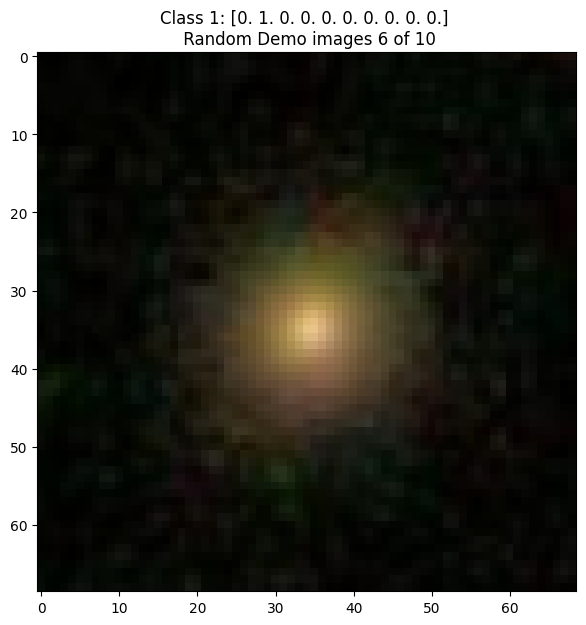

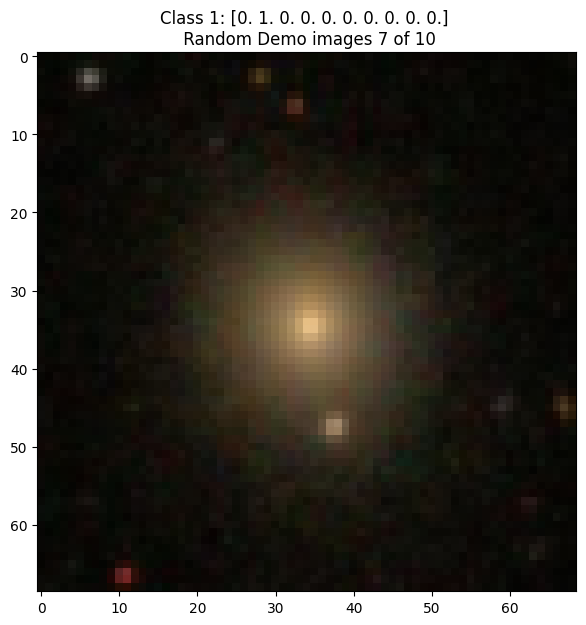

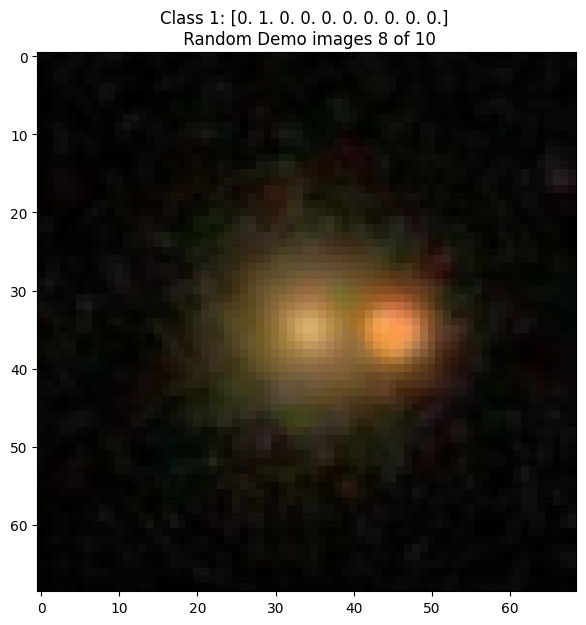

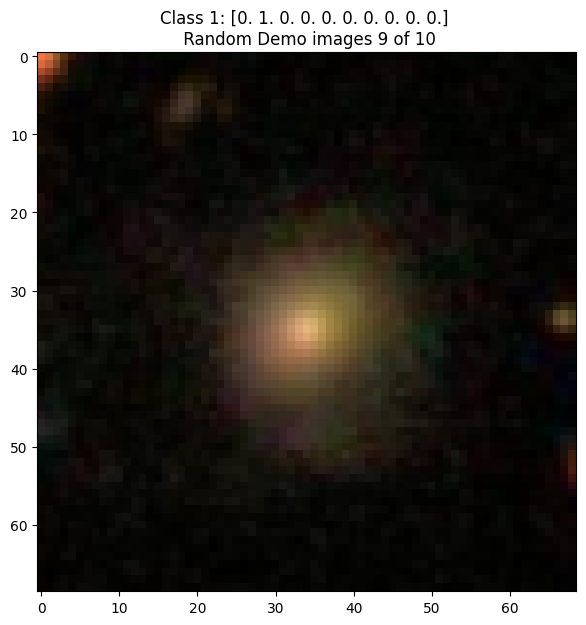

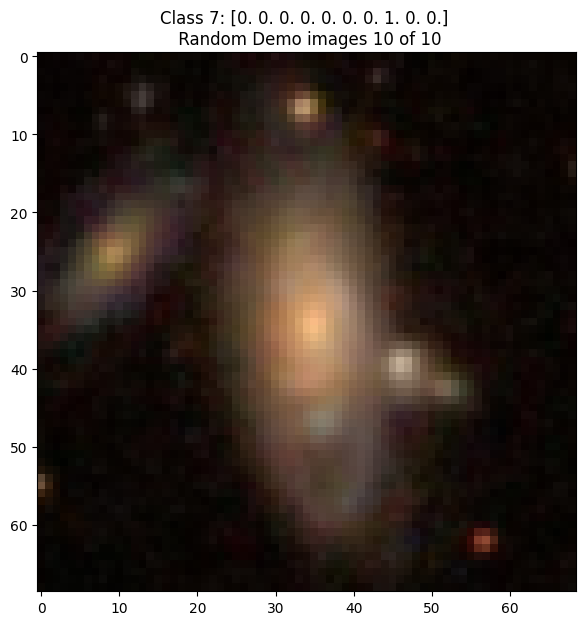

In [6]:
# Select 10 of the images to inspect
img = None
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
    plt.figure()
    img = plt.imshow(images[i])
    plt.title('Class {}: {} \n Random Demo images {} of 10'.format(np.argmax(labels[i]), galaxy10cls_lookup(labels[i]), counter+1))
    plt.draw()



# Your turn to play !

In [11]:
print(labels)
print(np.shape(labels))

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
(21785, 10)


In [14]:
# first we need to take only spiral galaxies from our sample

label_spirals_list=[]
images_spirals_list= []

for i in range(0,21785):
  if (labels[i,7]==1) or (labels[i,8]==1) or (labels[i,9]==1) :
    label_spirals_list.append(labels[i,:])
    images_spirals_list.append(images[i,:])

label_spirals= np.array(label_spirals_list)
images_spirals= np.array(images_spirals_list)

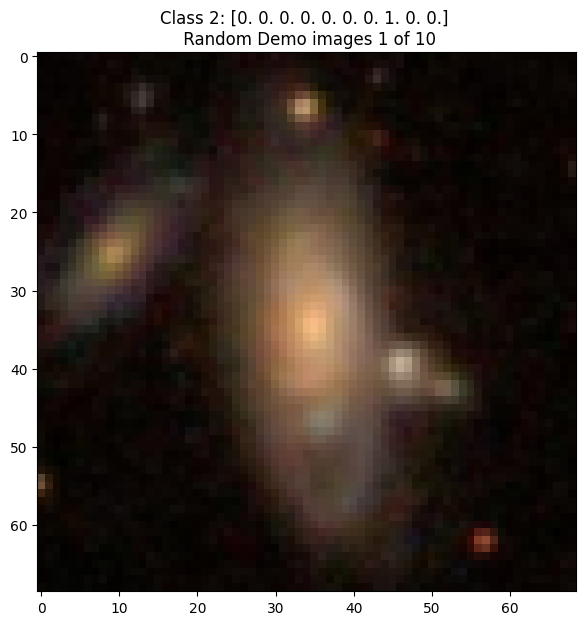

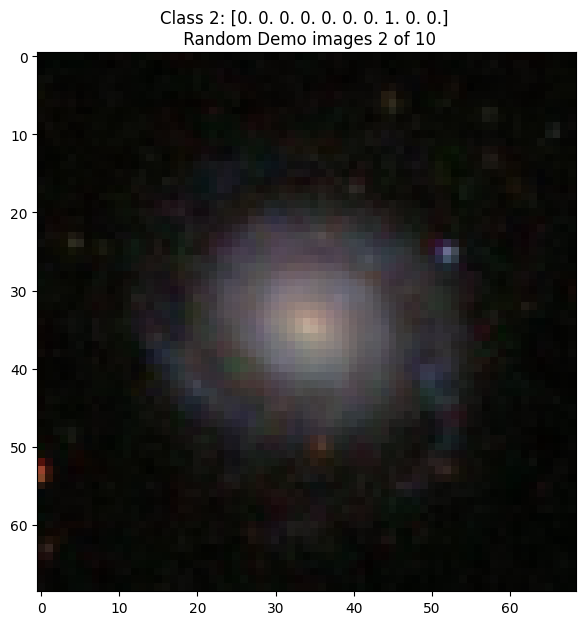

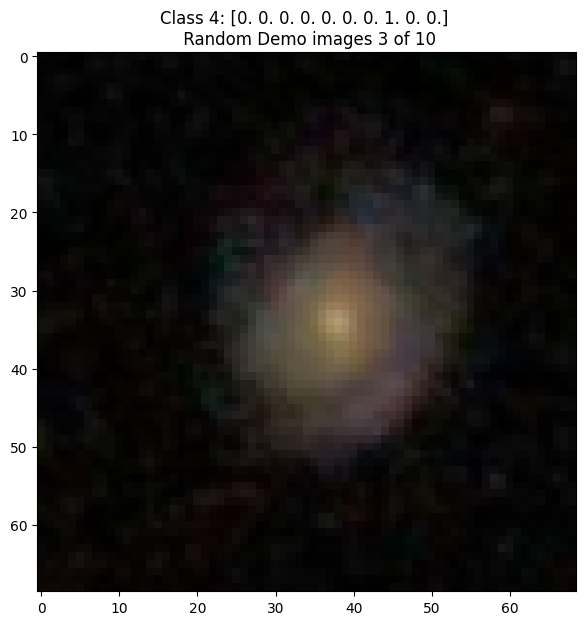

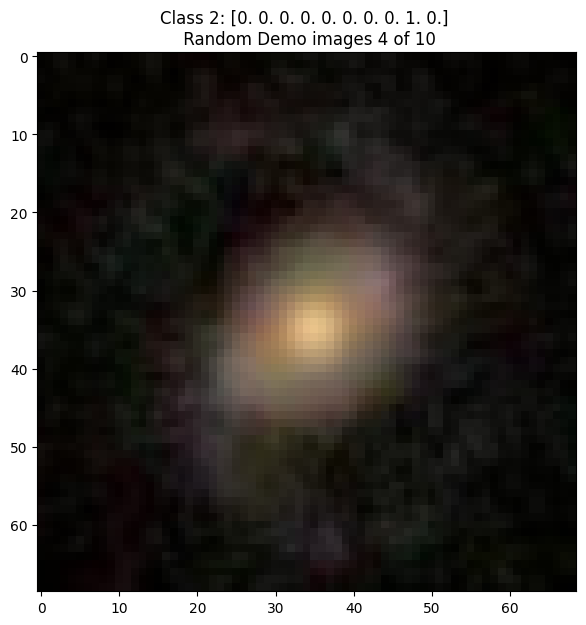

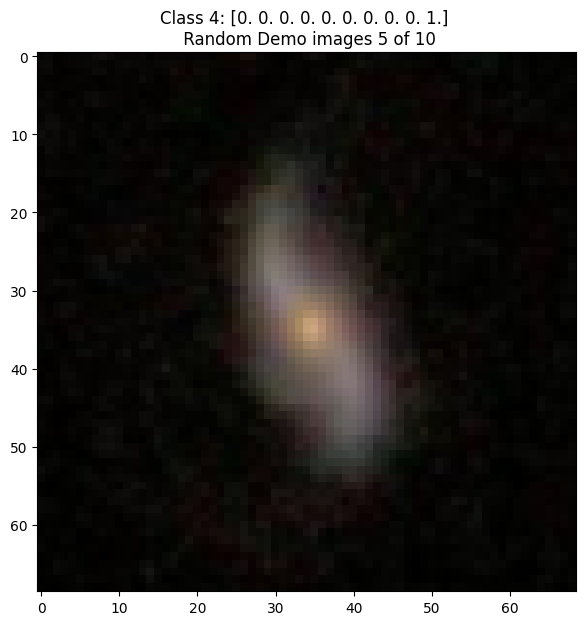

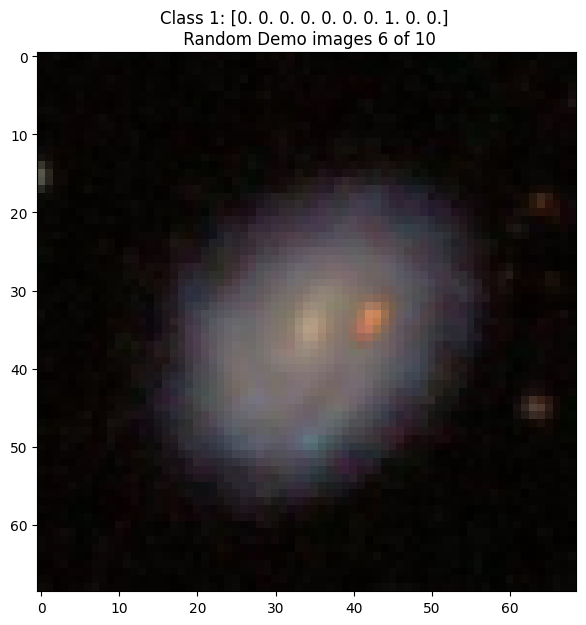

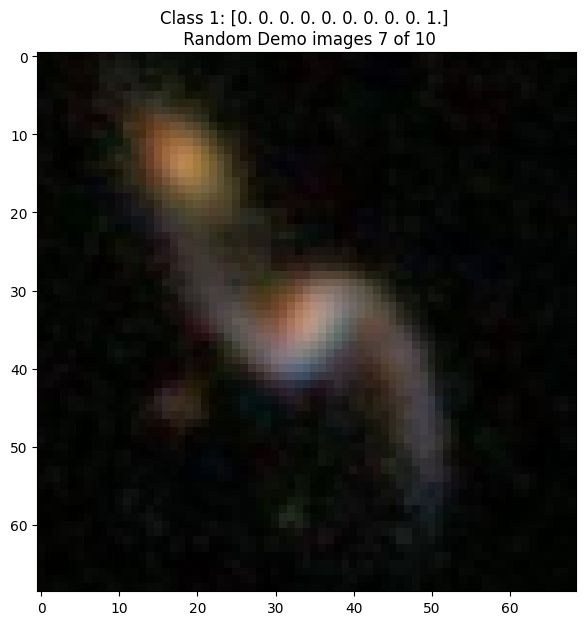

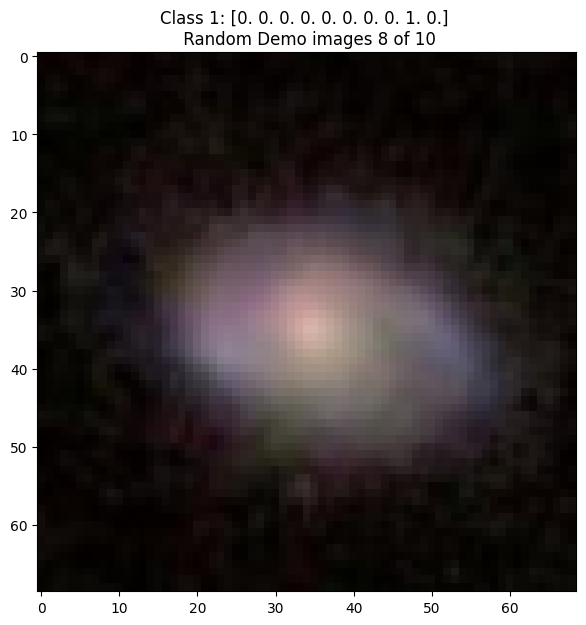

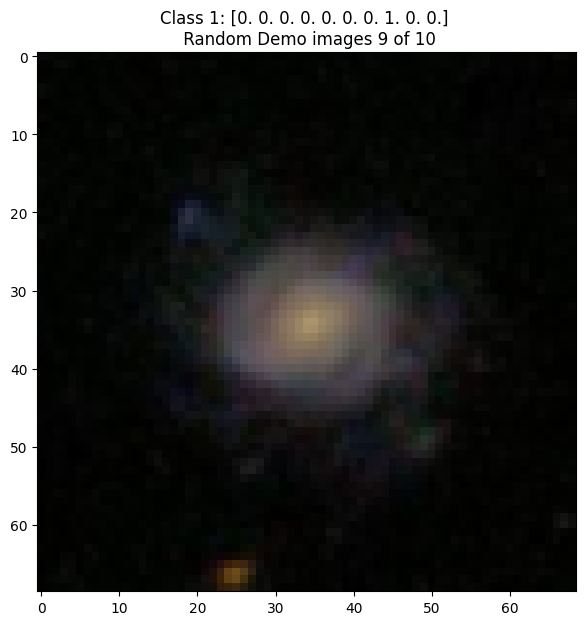

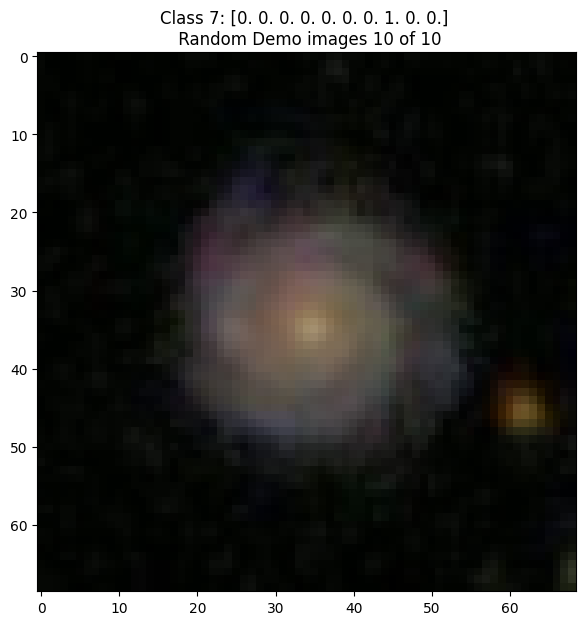

In [16]:
# we can check if everything went fine on a few examples

img = None
for counter, i in enumerate(range(np.random.randint(0, label_spirals.shape[0], size=10).shape[0])):
    plt.figure()
    img = plt.imshow(images_spirals[i])
    plt.title('Class {}: {} \n Random Demo images {} of 10'.format(np.argmax(labels[i]), label_spirals[i], counter+1))
    plt.draw()

In [20]:
# now we can separate our set into a training and a testing set
print(np.shape(images_spirals))

# divide between a training set and a test set
train_images_spirals, train_labels_spirals= images_spirals[0:2000;:], label_spirals[0:2000;:]
test_images_spirals, test_labels_spirals= images_spirals[2000:-1;:], label_spirals[2000:-1;:]

img = None
for counter, i in enumerate(range(np.random.randint(0, label_spirals.shape[0], size=10).shape[0])):
    plt.figure()
    img = plt.imshow(images_spirals[i])
    plt.title('Class {}: {} \n Random Demo images {} of 10'.format(np.argmax(labels[i]), label_spirals[i], counter+1))
    plt.draw()

"""# prepare the data for training
xmax=train_images_spirals.max()
train_images_spirals = train_images_spirals / xmax
test_images_spirals  = test_images_spirals  / xmax

print("Training image shape", train_images_spirals.shape)
print("Testing image shape", test_images_spirals.shape)"""


(2546, 69, 69, 3)


'# divide between a training set and a test set\ntrain_images_spirals, train_labels_spirals= images_spirals[0]\n (test_images_spirals, test_labels_spirals) \n\n# prepare the data for training\nxmax=train_images_spirals.max()\ntrain_images_spirals = train_images_spirals / xmax\ntest_images_spirals  = test_images_spirals  / xmax\n\nprint("Training image shape", train_images_spirals.shape)\nprint("Testing image shape", test_images_spirals.shape)'

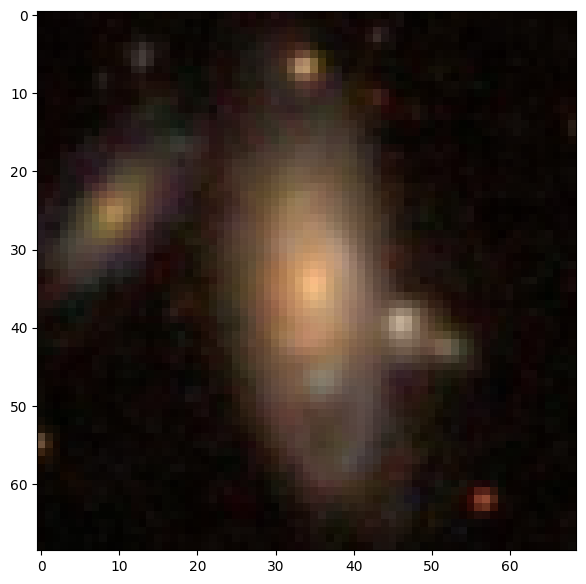

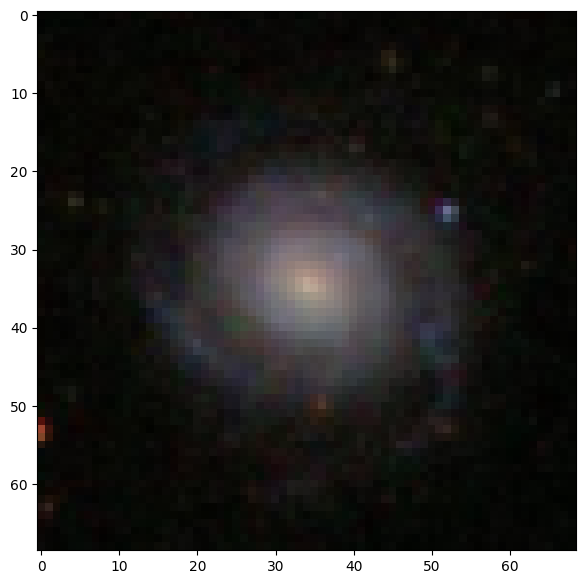

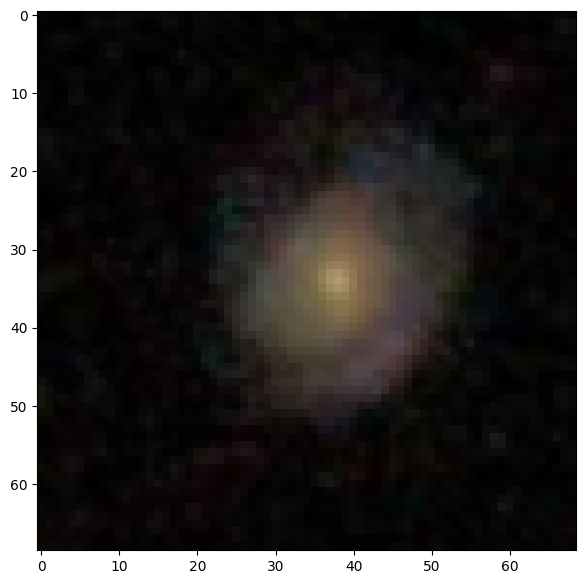

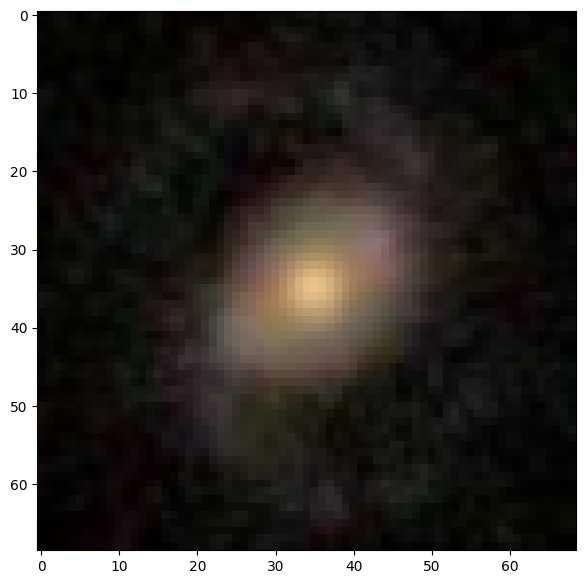

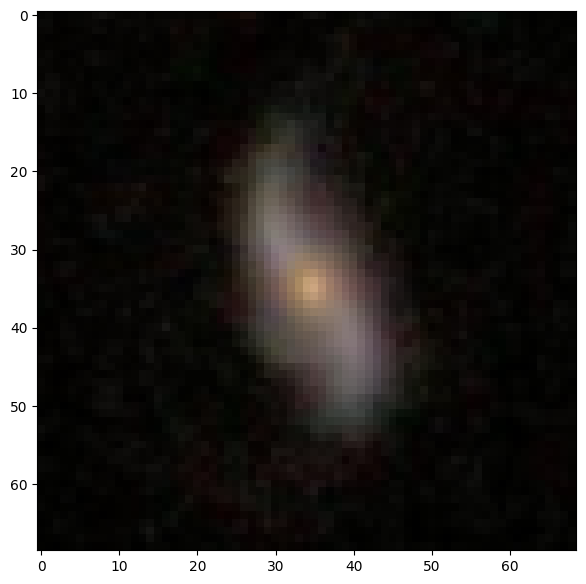

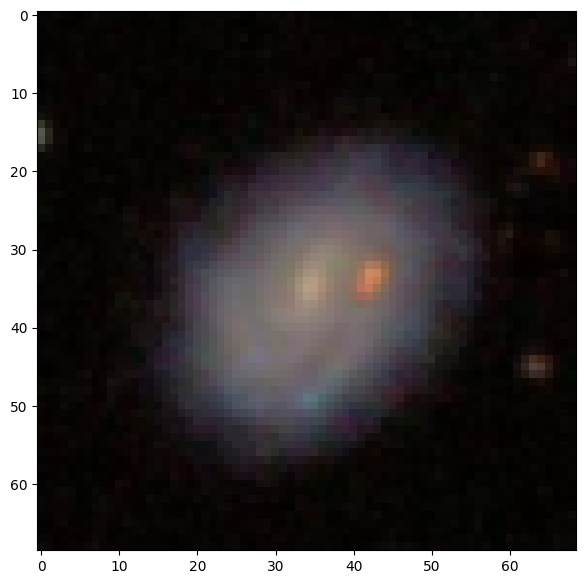

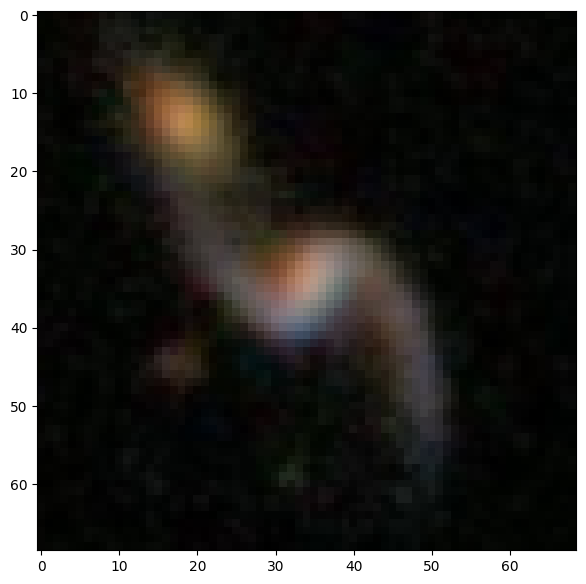

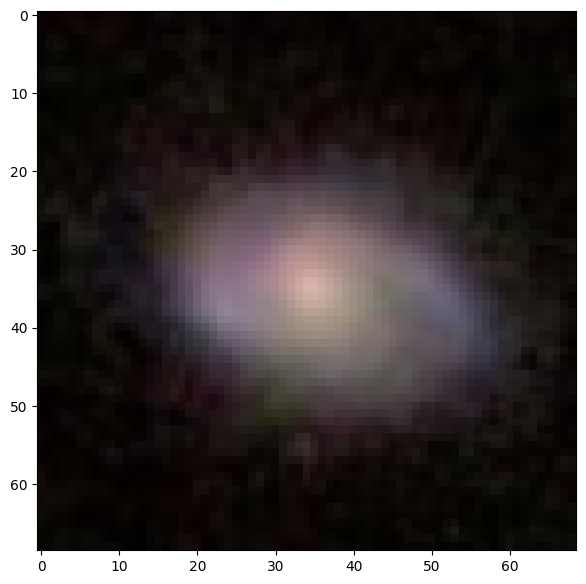

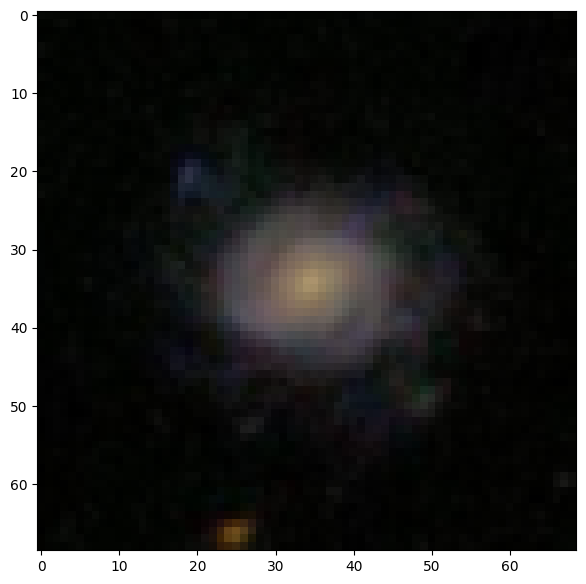

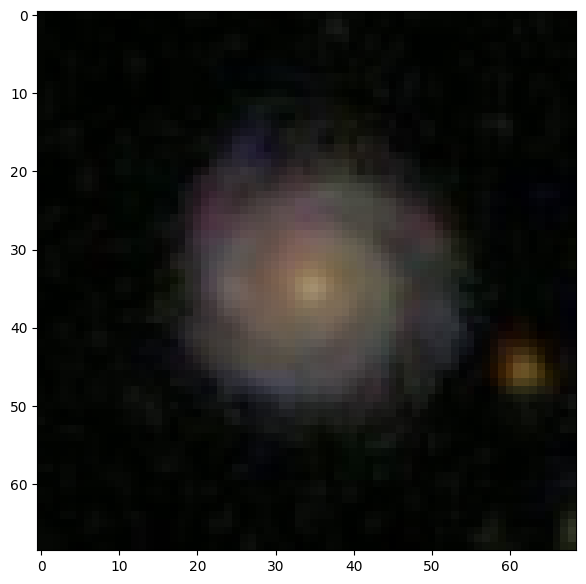